In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,classification_report,accuracy_score
lr=LogisticRegression()
dtr=DecisionTreeClassifier(max_depth=3)
knn=KNeighborsClassifier
ada,rfr,svm=AdaBoostClassifier(),RandomForestClassifier(),SVC()
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('automobile.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.drop('policy_number',inplace=True,axis=1)

In [5]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
df.isnull().sum()/len(df)

months_as_customer             0.0
age                            0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries                0.0
witnesses           

In [7]:
df.drop('_c39',inplace=True,axis=1)

In [8]:
nan=df[df['police_report_available']=='?']

In [9]:
nan.shape

(343, 38)

In [10]:
343/len(df)

0.343

In [11]:
df.drop('police_report_available',inplace=True,axis=1)

In [12]:
df.drop('policy_bind_date',inplace=True,axis=1)

In [13]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,1,2,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,0,1,6500,1300,650,4550,Accura,RSX,2009,N


In [14]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [15]:
col_transform=['policy_state','policy_csl','insured_sex','insured_occupation','insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','insured_education_level','auto_make','auto_model','auto_year','fraud_reported']

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
for m in col_transform:
    df[m]=le.fit_transform(df[m])

In [19]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                    int32
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [20]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,...,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,...,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,...,0.013384,0.022960,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,...,-0.000595,0.071500,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,...,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,...,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,...,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,...,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,...,-0.020297,0.042463,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,...,-0.012072,0.019211,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss=StandardScaler()

In [23]:
x=df.iloc[:,0:-1]

In [24]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [25]:
col=x.columns
for m in col:
    x[m]=ss.fit_transform(x[m].values.reshape(-1,1))

In [26]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,1,2,71610,6510,13020,52080,10,1,9,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,0,0,5070,780,780,3510,8,12,12,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,2,3,34650,7700,3850,23100,4,30,12,0
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,1,2,63400,6340,6340,50720,3,34,19,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,0,1,6500,1300,650,4550,0,31,14,0


In [27]:
from sklearn.preprocessing import normalize

In [28]:
normalize=normalize(df)
normalize_data=pd.DataFrame(normalize)

In [29]:
normalize_data.var()

0     6.417020e-08
1     1.114463e-09
2     2.792750e-12
3     2.648544e-12
4     1.953197e-06
5     1.094991e-06
6     1.601709e-01
7     1.261856e-01
8     9.302112e-13
9     1.736070e-11
10    7.899046e-11
11    1.570572e-10
12    1.261420e-11
13    2.930127e-03
14    2.972730e-03
15    1.467275e-09
16    4.537368e-12
17    5.201149e-12
18    3.747996e-12
19    1.037433e-11
20    2.148135e-11
21    1.856867e-11
22    4.088500e-07
23    2.329971e-10
24    5.280570e-12
25    2.708006e-12
26    2.642352e-12
27    5.286330e-12
28    3.768691e-03
29    1.088895e-04
30    1.024790e-04
31    1.943526e-03
32    7.811147e-11
33    6.127611e-10
34    1.767200e-10
35    6.065885e-13
dtype: float64

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,stratify=y)

In [31]:
lr.fit(xtrain,ytrain)

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lr.score(xtrain,ytrain)

0.8066666666666666

In [33]:
accuracy_score(lr.predict(xtest),ytest)

0.804

In [34]:
confusion_matrix(lr.predict(xtest),ytest)

array([[178,  39],
       [ 10,  23]], dtype=int64)

In [35]:
print(classification_report(lr.predict(xtest),ytest))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       217
           1       0.37      0.70      0.48        33

    accuracy                           0.80       250
   macro avg       0.66      0.76      0.68       250
weighted avg       0.87      0.80      0.83       250



In [36]:
yes=df[df['fraud_reported']==1]

In [37]:
no=df[df['fraud_reported']==0]

In [38]:
yes.shape

(247, 36)

In [39]:
no.shape

(753, 36)

In [40]:
def val_score(n_neighbors):
    avg=[]
    std=[]
    for i in n_neighbors:
        score=cross_val_score(knn(n_neighbors=i),xtrain,ytrain,cv=10)
        avg.append(score.mean())
        std.append(score.std())
    return avg,std

In [41]:
n_neighbors=range(1,50)
mean,std=val_score(n_neighbors)

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

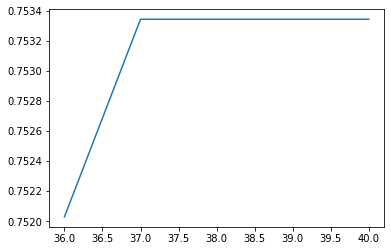

In [42]:
plt.plot(n_neighbors[35:40],mean[35:40])

In [43]:
cross_val_score(knn(n_neighbors=37),xtrain,ytrain,cv=10).mean()

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-

0.7533428165007112

In [44]:
knn=KNeighborsClassifier(n_neighbors=37)

In [45]:
knn.fit(xtrain,ytrain)

C:\Users\utkarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform')

In [46]:
knn.score(xtrain,ytrain)

0.7546666666666667

In [47]:
confusion_matrix(knn.predict(xtest),ytest)

array([[188,  62],
       [  0,   0]], dtype=int64)

In [48]:
print(classification_report(knn.predict(xtest),ytest))

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.75      0.86       250
           1       0.00      0.00      0.00         0

    accuracy                           0.75       250
   macro avg       0.50      0.38      0.43       250
weighted avg       1.00      0.75      0.86       250



In [49]:
from imblearn.combine import SMOTETomek

In [50]:
smt=SMOTETomek()

In [51]:
print(x.shape)
print(y.shape)

(1000, 35)
(1000, 1)


In [52]:
x,y=smt.fit_sample(x,y)

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
y=y.reshape(-1,1)

In [54]:
print(x.shape)
print(y.shape)

(1504, 35)
(1504, 1)


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y)

In [56]:
def val_score(n_neighbors):
    avg=[]
    std=[]
    for i in n_neighbors:
        score=cross_val_score(knn(n_neighbors=i),x_train,y_train,cv=10)
        avg.append(score.mean())
        std.append(score.std())
    return avg,std

In [57]:
n_neighbors=range(1,50)
mean,std=val_score(n_neighbors)

TypeError: 'KNeighborsClassifier' object is not callable

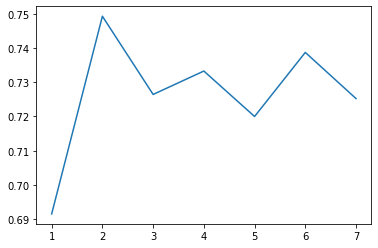

In [58]:
plt.plot(n_neighbors[0:7],mean[0:7])

In [59]:
knn=KNeighborsClassifier(n_neighbors=2)

In [60]:
knn.fit(x_train,y_train)

C:\Users\utkarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [61]:
knn.score(x_train,y_train)

0.9920212765957447

In [62]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       144
           1       0.93      0.75      0.83       232

    accuracy                           0.81       376
   macro avg       0.81      0.83      0.81       376
weighted avg       0.84      0.81      0.82       376



In [63]:
accuracy_score(knn.predict(x_test),y_test)

0.8138297872340425

In [64]:
confusion_matrix(knn.predict(x_test),y_test)

array([[131,  13],
       [ 57, 175]], dtype=int64)

In [65]:
dtr.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
dtr.score(x_train,y_train)

0.8820921985815603

In [67]:
print(classification_report(dtr.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       195
           1       0.80      0.83      0.82       181

    accuracy                           0.82       376
   macro avg       0.82      0.82      0.82       376
weighted avg       0.82      0.82      0.82       376



In [68]:
print(confusion_matrix(dtr.predict(x_test),y_test))

[[158  37]
 [ 30 151]]


In [69]:
cross_val_score(dtr,x_train,y_train,cv=10).mean()

0.8668546365914788

In [70]:
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=depth,random_state=10)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    validation_accuracy.append(dt_model.score(x_test,y_test))

In [71]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'valid_acc':validation_accuracy})

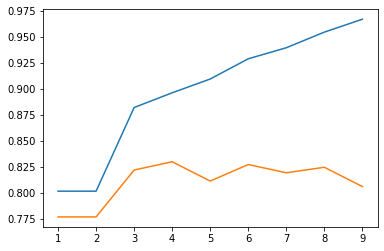

In [72]:
plt.plot(frame['max_depth'],frame['train_acc'])
plt.plot(frame['max_depth'],frame['valid_acc'])

In [73]:
svm.fit(x_train,y_train)

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [74]:
svm.score(x_train,y_train)

0.950354609929078

In [75]:
print(classification_report(svm.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       182
           1       0.86      0.84      0.85       194

    accuracy                           0.85       376
   macro avg       0.85      0.85      0.85       376
weighted avg       0.85      0.85      0.85       376



In [76]:
cv=cross_val_score(svm,x,y,cv=10)

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version

In [77]:
cv.mean()

0.8691754385964913

In [78]:
cv.std()

0.05471817326709567

In [79]:
import warnings
warnings.filterwarnings('ignore')


In [80]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [81]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [82]:
from xgboost import XGBClassifier

In [83]:
ada=AdaBoostClassifier()

In [84]:
rfr=RandomForestClassifier()

In [85]:
xg=XGBClassifier()

In [86]:
model=[ada,rfr,xg]

In [87]:
for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    print(classification_report(m.predict(x_test),y_test))
    print(confusion_matrix(m.predict(x_test),y_test))

0.898936170212766
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       189
           1       0.86      0.87      0.86       187

    accuracy                           0.86       376
   macro avg       0.86      0.86      0.86       376
weighted avg       0.86      0.86      0.86       376

[[163  26]
 [ 25 162]]
0.9946808510638298
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       204
           1       0.80      0.88      0.84       172

    accuracy                           0.85       376
   macro avg       0.85      0.85      0.85       376
weighted avg       0.85      0.85      0.85       376

[[167  37]
 [ 21 151]]
0.9627659574468085
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       179
           1       0.89      0.85      0.87       197

    accuracy                           0.86       376
   macro avg       0.86   

In [97]:
cv=cross_val_score(xg,x,y,cv=10)

In [98]:
cv.mean()

0.8878947368421052

In [99]:
cv.std()

0.06187955814997347

In [100]:
import pickle

In [101]:
model_automibile=pickle.dumps(xg)